<a href="https://colab.research.google.com/github/elz-ming/Reco/blob/main/Edmund_CollaborativeFiltering_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Before We Begin...**

## **Data Set :**
The Data Set can be acquired from the link below.

**Google Drive** \>>> https://drive.google.com/drive/folders/1BD8m7a8m7onaifZay05yYjaLxyVV40si?usp=sharing

## **Reference :**
**Recommendation on Live-Streaming Platforms: Dynamic Availability and Repeat Consumption**

Jérémie Rappaz, Julian McAuley and Karl Aberer

RecSys, 2021

**PDF** \>>> https://cseweb.ucsd.edu/~jmcauley/pdfs/recsys21b.pdf

# **Let's Begin!**

In [ ]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

In [ ]:
# max nrows = 3051733
df = pd.read_csv('100k_a.csv', names=['user_id','stream_id','streamer_id','time_start','time_stop'])

In [ ]:
df

,user_id,stream_id,streamer_id,time_start,time_stop
0,1,33842865744,mithrain,154,156
1,1,33846768288,alptv,166,169
2,1,33886469056,mithrain,587,588
3,1,33887624992,wtcn,589,591
4,1,33890145056,jrokezftw,591,594
...,...,...,...,...,...
3051728,100000,34167930576,mckytv,3582,3583
3051729,100000,34168288656,natehill,3582,3583
3051730,100000,34169594512,fortnite,3582,3584
3051731,100000,34180223072,highdistortion,3709,3711


In [ ]:
for name in df.columns:
  print(name, ':',len(df[name]), len(df[name].unique()))

user_id : 3051733 100000
stream_id : 3051733 739991
streamer_id : 3051733 162625
time_start : 3051733 6148
time_stop : 3051733 6148


In [ ]:
user_ids = df["user_id"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded2user = {i: x for i, x in enumerate(user_ids)}
streamer_ids = df["streamer_id"].unique().tolist()
streamer2streamer_encoded = {x: i for i, x in enumerate(streamer_ids)}
streamer_encoded2streamer = {i: x for i, x in enumerate(streamer_ids)}

df["user"] = df["user_id"].map(user2user_encoded)
df["streamer"] = df["streamer_id"].map(streamer2streamer_encoded)

num_user = len(user2user_encoded)
num_streamer = len(streamer2streamer_encoded)
df['duration'] = (df['time_stop'] - df['time_start'])*10
min_duration = min(df["duration"])
max_duration = max(df["duration"])

print(
    "Number of user: {}, Number of Streamer: {}, Min duration: {}, Max duration: {}".format(
        num_user, num_streamer, min_duration, max_duration
    )
)

Number of user: 100000, Number of Streamer: 162625, Min duration: 10, Max duration: 970


In [ ]:
df

,user_id,stream_id,streamer_id,time_start,time_stop,user,streamer,duration
0,1,33842865744,mithrain,154,156,0,0,20
1,1,33846768288,alptv,166,169,0,1,30
2,1,33886469056,mithrain,587,588,0,0,10
3,1,33887624992,wtcn,589,591,0,2,20
4,1,33890145056,jrokezftw,591,594,0,3,30
...,...,...,...,...,...,...,...,...
3051728,100000,34167930576,mckytv,3582,3583,99999,114,10
3051729,100000,34168288656,natehill,3582,3583,99999,1879,10
3051730,100000,34169594512,fortnite,3582,3584,99999,96,20
3051731,100000,34180223072,highdistortion,3709,3711,99999,105,20


In [ ]:
streamer2streamer_encoded

{'mithrain': 0,
 'alptv': 1,
 'wtcn': 2,
 'jrokezftw': 3,
 'berkriptepe': 4,
 'kendinemuzisyen': 5,
 'unlostv': 6,
 'zeon': 7,
 'elraenn': 8,
 'jahrein': 9,
 'raufbaba25': 10,
 'ogrencievi': 11,
 'eraymaskulen': 12,
 'zeusidiouss': 13,
 'h3x_tv': 14,
 'towshun': 15,
 'esl_csgo': 16,
 'grimnax': 17,
 'jtgtv': 18,
 'bumblebee_kr': 19,
 'hanryang1125': 20,
 'wan6491': 21,
 'chfhdtpgus1': 22,
 'sal_gu': 23,
 'lol_ambition': 24,
 'dmdtkadl69': 25,
 'rechotz': 26,
 'lol_madlife': 27,
 'nanajam777': 28,
 'tankergm': 29,
 'rngudwnswkd': 30,
 'kimhj1478': 31,
 'goemdawon': 32,
 'leehunnyeo': 33,
 'grma1717': 34,
 'megthomatho': 35,
 'klugee': 36,
 'mrscheff': 37,
 'quickybaby': 38,
 'tankelit': 39,
 'skill4ltu': 40,
 'kajzoo': 41,
 'wearethevr': 42,
 'dakillzor': 43,
 'mrsavage': 44,
 'videoyun': 45,
 'rasney': 46,
 'motor': 47,
 'cmenzy': 48,
 'humanilliance': 49,
 'timthetatman': 50,
 'solaryfortnite': 51,
 'tfue': 52,
 'brascolive': 53,
 'script': 54,
 'rammus53': 55,
 'ninja': 56,
 'uthener

In [ ]:
df[df['streamer_id'] == 'faker'].sort_values(by="duration", ascending=False)

,user_id,stream_id,streamer_id,time_start,time_stop,user,streamer,duration
886491,29370,34244410832,faker,4387,4410,29369,259,230
1110229,36549,34244410832,faker,4387,4410,36548,259,230
1399440,46219,34244410832,faker,4387,4410,46218,259,230
1271000,41920,34244410832,faker,4387,4410,41919,259,230
36108,1227,34244410832,faker,4387,4410,1226,259,230
...,...,...,...,...,...,...,...,...
1329421,43897,34414163040,faker,6136,6137,43896,259,10
1330069,43922,34320676432,faker,5145,5146,43921,259,10
1331209,43965,34320676432,faker,5148,5149,43964,259,10
1331584,43982,34246729504,faker,4430,4431,43981,259,10


In [ ]:
df = df.sample(frac=1, random_state=42)
x = df[["user", "streamer"]].values
#Normalizing Target
y = df["duration"].apply(lambda x: (x - min_duration) / (max_duration - min_duration)).values
# Assuming training on 90% of the data and validating on 10%.
train_indices = int(0.9 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

In [ ]:
EMBEDDING_SIZE = 20

class RecommenderNet(keras.Model):
  def __init__(self, num_user, num_streamer, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    #Initializing 3 VARS
    self.num_user = num_user
    self.num_streamer = num_streamer
    self.embedding_size = embedding_size

    #Declaring embeddings and bias for USER
    self.user_embedding = layers.Embedding(
        num_user,
        embedding_size,
        embeddings_initializer='he_normal',
        embeddings_regularizer=keras.regularizers.l2(1e-6),
    )
    self.user_bias = layers.Embedding(num_user, 1)

    #Declaring embeddings and bias for STREAMER
    self.streamer_embedding = layers.Embedding(
        num_streamer,
        embedding_size,
        embeddings_initializer='he_normal',
        embeddings_regularizer=keras.regularizers.l2(1e-6),
    )
    self.streamer_bias = layers.Embedding(num_streamer, 1)

  def call(self, inputs):
    #Declaring vector and bias for USER
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:,0])

    #Declaring vector and bias for STREAMER
    streamer_vector = self.streamer_embedding(inputs[:,0])
    streamer_bias = self.streamer_bias(inputs[:,0])

    #Dot Product of two vectors
    dot_user_streamer = tf.tensordot(user_vector, streamer_vector, 2)

    #Add all the components (including the bias)
    x = dot_user_streamer + user_bias + streamer_bias

    #Sigmoid activation function to force ratings between 0 and 1, RECCO or NOT recco
    return tf.nn.sigmoid(x)

In [ ]:
model = RecommenderNet(num_user, num_streamer, EMBEDDING_SIZE)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
)

In [ ]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=5,
    verbose=1,
    validation_data=(x_val,y_val),
)

Epoch 1/5
42915/42915 [==============================] - 243s 6ms/step - loss: 0.1306 - val_loss: 0.1163
Epoch 2/5
42915/42915 [==============================] - 230s 5ms/step - loss: 0.1135 - val_loss: 0.1135
Epoch 3/5
42915/42915 [==============================] - 230s 5ms/step - loss: 0.1110 - val_loss: 0.1117
Epoch 4/5
42915/42915 [==============================] - 228s 5ms/step - loss: 0.1093 - val_loss: 0.1103
Epoch 5/5
42915/42915 [==============================] - 228s 5ms/step - loss: 0.1079 - val_loss: 0.1094


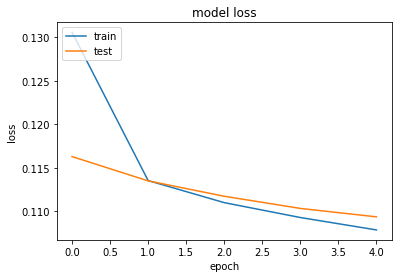

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [ ]:
streamer_list = df['streamer_id'].unique().tolist()

streamer_df = pd.DataFrame(data=streamer_list, columns=['streamer_id'])

In [ ]:
streamer_df

,streamer_id
0,trolljac
1,jay_savage95
2,roxyproxxy
3,mckytv
4,kjh203520
...,...
162620,hatwearinggamer
162621,gluvvvvv
162622,sankuralp
162623,wavyy


In [ ]:
user_id = df.user_id.sample(1).iloc[0]

streamer_watched_by_user = df[df.user_id == user_id]

streamer_not_watched = df[
    ~df['streamer_id'].isin(streamer_watched_by_user.user_id.values)
    ].streamer_id
streamer_not_watched = list(
    set(streamer_not_watched).intersection(set(streamer2streamer_encoded.keys()))
)
streamer_not_watched = [[streamer2streamer_encoded.get(x)] for x in streamer_not_watched]

user_encoder = user2user_encoded.get(user_id)

user_streamer_array = np.hstack(
    ([[user_encoder]] * len(streamer_not_watched), streamer_not_watched)
)

ratings = model.predict(user_streamer_array).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_streamer_ids = [
    streamer_encoded2streamer.get(streamer_not_watched[x][0]) for x in top_ratings_indices
]

print("Showing recommendations for user: {}".format(user_id))
print("====" * 9)
print("Streamers with high ratings from user")
print("----" * 8)

top_streamer_user = (
    streamer_watched_by_user.sort_values(by="duration", ascending=False)
    .head(5)
    .streamer_id.values
)
streamer_df_rows = streamer_df[streamer_df["streamer_id"].isin(top_streamer_user)]
for row in streamer_df_rows.itertuples():
    print(row.streamer_id)
  
print("----" * 8)
print("Top 10 streamer recommendations")
print("----" * 8)
recommended_streamer = streamer_df[streamer_df["streamer_id"].isin(recommended_streamer_ids)]
for row in recommended_streamer.itertuples():
    print(row.streamer_id)

Showing recommendations for user: 34471
Streamers with high ratings from user
--------------------------------
tsm_hamlinz
symfuhny
treandj
--------------------------------
Top 10 streamer recommendations
--------------------------------
sopstv
mickanplays
misimaruk
itsmahony
kblock_1953
realiityplayer
obadamann
cixto
wolfsedative
emmuhrose
